# 1下载数据集
可以从https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz 网址下载
下载的文件名是cifar-10-python.tar.gz，该先在Jupty代码目录下建立data子目录，然后把下载的数据文件放到data目录


In [1]:
import urllib.request
import os 
import tarfile
import numpy as np
url='https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
filepath='data/cifar-10-python.tar.gz'
if not os.path.isfile(filepath):
    result=urllib.request.urlretrievel(url,filepath)
    print('downloaded:',result)
else:
    print('Data file already exists.')
# 解压
if not os.path.exists('data/cifar-10-python.tar.gz'):
    tfile=tarfile.open('data/cifar-10-python.tar.gz','r:gz')
    result=tfile.extractall('data/')
    print('Extracted to ./data/cifar-10-batches-py/')
else:
    print('Directory already exists')
    

Data file already exists.
Directory already exists


# 2导入数据集

In [2]:
import pickle
def load_Cifar_batch(filename):
    # laod single batch of cifar
    # open with binary
    with open(filename,'rb')as f:
        data_dict=pickle.load(f,encoding='bytes')
        images=data_dict[b'data']
        labels=data_dict[b'labels']
        
        images=images.reshape(10000,3,32,32)
        images=images.transpose(0,2,3,1)
        labels=np.array(labels)
        return images,labels                      

In [3]:
def load_CIFAR_data(data_dir):
    """ load all of cifar """
    images_train = []
    labels_train= []
    for b in range(1,6):
        f = os.path.join(data_dir, 'data_batch_%d' % (b, ))
        print('loading',f)
        image_batch,label_batch=load_Cifar_batch(f)
        images_train.append(image_batch)
        labels_train.append(label_batch)
        Xtrain=np.concatenate(images_train)
        Ytrain=np.concatenate(labels_train)
        del image_batch,label_batch
    Xtest,Ytest=load_Cifar_batch(os.path.join(data_dir,'test_batch'))
    print('finished loadding Cifar-10 data')        
    return Xtrain,Ytrain,Xtest,Ytest
data_dir='data/cifar-10-batches-py'
Xtrain,Ytrain,Xtest,Ytest=load_CIFAR_data(data_dir)

loading data/cifar-10-batches-py\data_batch_1
loading data/cifar-10-batches-py\data_batch_2
loading data/cifar-10-batches-py\data_batch_3
loading data/cifar-10-batches-py\data_batch_4
loading data/cifar-10-batches-py\data_batch_5
finished loadding Cifar-10 data


In [4]:
print('Training data shape: ', Xtrain.shape)
print('Training labels shape: ', Ytrain.shape)
print('Test data shape: ', Xtest.shape)
print('Test labels shape: ', Ytest.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


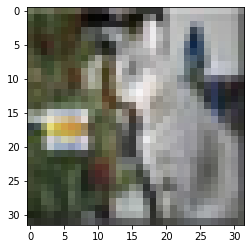

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(Xtrain[78])

In [6]:
print(Ytrain[6])

2


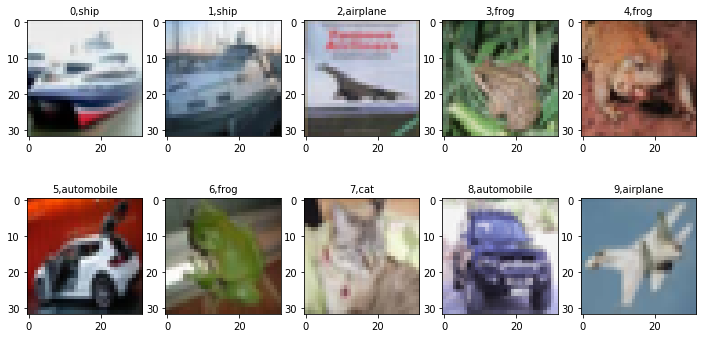

In [7]:
import matplotlib.pyplot as plt
# 定义标签字典
label_dict={0:'airplane',1:'automobile',2:'bird',3:"cat",4:'deer',5:'dog',6:'frog',7:'house',8:'ship',9:'trunk'}
#定义图像数据及对应标签
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,6)
    if num>10:
        num=10
    for i in range(0,num):
        ax=plt.subplot(2,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title=str(i)+','+label_dict[labels[idx]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[idx]]
        ax.set_title(title,fontsize=10)
        idx+=1
    plt.show()
plot_images_labels_prediction(Xtest,Ytest,[],1,10)


# 3数据预处理
## 3.1图像数据预处理


In [8]:
# 查看数据信息
#第一个像素点
Xtrain[0][0][0]
#第一个像素点在rgb三个像素上的像素值

array([59, 62, 63], dtype=uint8)

In [9]:
#对图像数字标准化
Xtrain_normalize=Xtrain.astype('float32')/255.0
Xtest_normalize=Xtest.astype('float32')/255.0

In [10]:
# 查看标准化后的像素值
Xtrain_normalize[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

## 3.2标签数据预处理

In [11]:
Ytrain[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3])

独热编码分类，在这里需要将它改为独热编码

In [12]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)
yy=[[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]]
encoder.fit(yy)
Ytrain_reshape=Ytrain.reshape(-1,1)
Ytrain_onehot=encoder.transform(Ytrain_reshape)
Ytest_reshape=Ytest.reshape(-1,1)
Ytest_onehot=encoder.transform(Ytest_reshape)

E:\anaconda\anaconda\envs\TensorFlow\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [13]:
Ytrain_onehot.shape

(50000, 10)

In [14]:
Ytrain[:5]

array([6, 9, 9, 4, 1])

In [15]:
Ytrain_onehot[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

# 4建立Cifar-10图像分类模型

In [16]:
import tensorflow as tf
tf.reset_default_graph()


## 定义共享函数

In [17]:
# 定义权值
def weight(shape):
    # 在构建模型时，需要使用tf.Variable来创建一个变量
    # 训练时变量不停更新
    #在使用函数tf.truncated_normal（截取正态分布）生成标准差为0.1的随机数来初始化权重
    return  tf.Variable(tf.truncated_normal(shape,stddev=0.1),name='W')
#定义偏置
#初始化0.1
def bias(shape):
    return tf.Variable(tf.constant(0.1,shape=shape),name='b')
#定义卷积操作
#步长为1.padding为‘SAME’
def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')
# 定义池化操作
# 步长为2，即原始长度长宽都除以2
def max_pool_22(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')


## 4.2定义网络结构

In [18]:
# 输入层
# 32*32图像通道为3（RGB）
with tf.name_scope('input_layer'):
    x=tf.placeholder('float',shape=[None,32,32,3],name='x')
# 第一个卷积层
# 输入通道为3，输出通道为32，卷积后图像尺寸不变，依然是32*32
with tf.name_scope('conv_1'):
    W1=weight([3,3,3,32])#1卷积核的宽，卷积核的高，输入通道，输出通道数量
    b1=bias([32])
    conv_1=conv2d(x,W1)+b1
    conv_1=tf.nn.relu(conv_1)
#第一个池化层
#将32*32图像缩小到16*16，池化不改变通道数量，因此还是32个
with tf.name_scope('pool_1'):
    pool_1=max_pool_22(conv_1)
#第二个卷积层
#输入通道：32.输出通道：64，卷积后尺寸不变，依然是16*16
with tf.name_scope('conv_2'):
    W2=weight([3,3,32,64])#1卷积核的宽，卷积核的高，输入通道，输出通道数量
    b2=bias([64])
    conv_2=conv2d(pool_1,W2)+b2
    conv_2=tf.nn.relu(conv_2)
#第2个池化层
#将16*16图像缩小到8*8，池化不改变通道数量，因此还是32个
with tf.name_scope('pool_2'):
    pool_2=max_pool_22(conv_2)
# 全连接层
# 将池化第二个池化层的64个8*8图像转为1维向量，长度是64*8*8=4096
with tf.name_scope('fc'):
    W3=weight([4096,128])
    b3=bias([128])
    flat=tf.reshape(pool_2,[-1,4096])
    h=tf.nn.relu(tf.matmul(flat,W3)+b3)
    h_dropout=tf.nn.dropout(h,keep_prob=0.8)#加入dropout避免过拟合
#再加入一层池化层
with tf.name_scope('fc2'):
    W4=weight([128,128])
    b4=bias([128])
    h2=tf.nn.relu(tf.matmul(h_dropout,W4)+b4)
    h_dropout2=tf.nn.dropout(h2,keep_prob=0.8)#加入dropout避免过拟合
#输出层
#输出层共有10个神经元，对应0-9个类别
with tf.name_scope('output_layer'):
    W5=weight([128,10])
    b5=bias([10])
    pred=tf.nn.softmax(tf.matmul(h_dropout,W5)+b5)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# 4.3构建模型

In [19]:
with tf.name_scope('optimizer'):
    # 定义占位符
    y=tf.placeholder('float',shape=[None,10],name='label')
    #定义损失函数
    loss_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
    #选择优化器
    optimizer=tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss_function)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



## 定义准确率

In [20]:
with tf.name_scope("evolution"):
    correct_prediction=tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
    accuracy=tf.reduce_mean(tf.cast(correct_prediction,'float'))


# 5训练

启动会话

In [21]:
import os 
from time import time
train_epochs=100
batch_size=50
total_batch=int(len(Xtrain)/batch_size)
epoch_list=[]
accuracy_list=[]
loss_list=[]
epoch=tf.Variable(0,name='epoch',trainable=False)
startTime=time()
sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)


断点续训

In [22]:
#  设置检查点存储目录
ckpt_dir='CIFAR10_log/'
if not os.path.exists(ckpt_dir):
    os.makedirs(ckpt_dir)
#生成saver
saver=tf.train.Saver(max_to_keep=1)
# 如果有检查点文件，读取最新检查文件，恢复各种变量值
ckpt=tf.train.latest_checkpoint(ckpt_dir)
if ckpt!= None:
    saver.restore(sess,ckpt)#加载所有参数
    #从这里接上次训练的轮数
else:
    print('Training from Scratch')
# 获取续训数据
start=sess.run(epoch)
print('Training starts from {}epoch.'.format(start+1))


Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from CIFAR10_log/CIFAR10_cnn_model.ckpt-50
Training starts from 50epoch.


迭代训练

In [23]:
def get_train_batch(number,batch_size):
    return Xtrain_normalize[number*batch_size:(number+1)*batch_size],\
            Ytrain_onehot[number*batch_size:(number+1)*batch_size]
for ep in range(start,train_epochs):
    for i in range(total_batch):
        batch_x,batch_y=get_train_batch(i,batch_size)
        sess.run(optimizer,feed_dict={x:batch_x,y:batch_y})
        if i%100==0:
            print('Step{}'.format(i),'finished')
    
    loss,acc=sess.run([loss_function,accuracy],feed_dict={x:batch_x,y:batch_y})
    epoch_list.append(ep+1)
    loss_list.append(loss)
    accuracy_list.append(acc)
    print('Train epoch:','%02d'%(sess.run(epoch)+1),\
         'Loss=','{:.6f}'.format(loss),'Accuracy=',acc)
    #保存检查点
    saver.save(sess,ckpt_dir+'CIFAR10_cnn_model.ckpt',global_step=ep+1)
    sess.run(epoch.assign(ep+1))
duration=time()-startTime
print('Train finished takes:',duration)
        

Step0 finished
Step100 finished
Step200 finished
Step300 finished
Step400 finished
Step500 finished
Step600 finished
Step700 finished
Step800 finished
Step900 finished
Train epoch: 50 Loss= 1.852676 Accuracy= 0.62
Step0 finished
Step100 finished
Step200 finished
Step300 finished
Step400 finished
Step500 finished
Step600 finished
Step700 finished
Step800 finished
Step900 finished
Train epoch: 51 Loss= 1.815643 Accuracy= 0.68
Instructions for updating:
Use standard file APIs to delete files with this prefix.
Step0 finished
Step100 finished
Step200 finished
Step300 finished
Step400 finished
Step500 finished
Step600 finished
Step700 finished
Step800 finished
Step900 finished
Train epoch: 52 Loss= 1.850963 Accuracy= 0.62
Step0 finished
Step100 finished
Step200 finished
Step300 finished
Step400 finished
Step500 finished
Step600 finished
Step700 finished
Step800 finished
Step900 finished
Train epoch: 53 Loss= 1.838841 Accuracy= 0.62
Step0 finished
Step100 finished
Step200 finished
Step300 fin

Train epoch: 86 Loss= 1.768558 Accuracy= 0.68
Step0 finished
Step100 finished
Step200 finished
Step300 finished
Step400 finished
Step500 finished
Step600 finished
Step700 finished
Step800 finished
Step900 finished
Train epoch: 87 Loss= 1.759251 Accuracy= 0.72
Step0 finished
Step100 finished
Step200 finished
Step300 finished
Step400 finished
Step500 finished
Step600 finished
Step700 finished
Step800 finished
Step900 finished
Train epoch: 88 Loss= 1.765622 Accuracy= 0.7
Step0 finished
Step100 finished
Step200 finished
Step300 finished
Step400 finished
Step500 finished
Step600 finished
Step700 finished
Step800 finished
Step900 finished
Train epoch: 89 Loss= 1.729812 Accuracy= 0.76
Step0 finished
Step100 finished
Step200 finished
Step300 finished
Step400 finished
Step500 finished
Step600 finished
Step700 finished
Step800 finished
Step900 finished
Train epoch: 90 Loss= 1.719005 Accuracy= 0.76
Step0 finished
Step100 finished
Step200 finished
Step300 finished
Step400 finished
Step500 finished

# 6模型的预测
## 6.1计算测试集上准确率


In [24]:
test_total_batch=int(len(Xtest_normalize)/batch_size)
test_acc_sum=0.0
for i in range(test_total_batch):
    test_image_batch=Xtest_normalize[i*batch_size:(i+1)*batch_size]
    test_label_batch=Ytest_onehot[i*batch_size:(i+1)*batch_size]
    test_batch_acc=sess.run(accuracy,feed_dict={x:test_image_batch,y:test_label_batch})
    test_acc_sum+=test_batch_acc
test_acc=float(test_acc_sum/test_total_batch)
print('test accuracy:{:.6f}'.format(test_acc))

test accuracy:0.683100


## 6.2利用模型进行预测

In [25]:
test_pred=sess.run(pred,feed_dict={x:Xtest_normalize[:10]})
prediction_result=sess.run(tf.argmax(test_pred,1))

## 6.3可视化预测结果

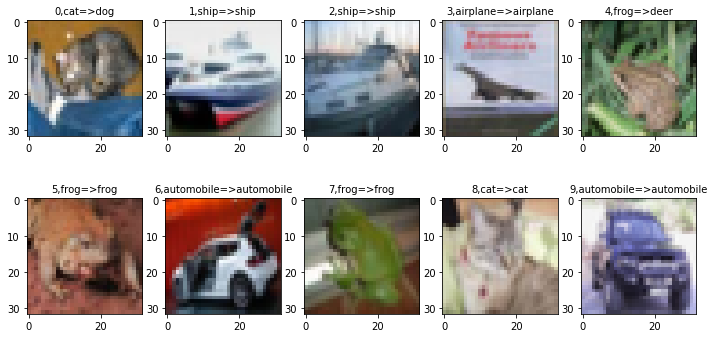

In [26]:
plot_images_labels_prediction(Xtest,Ytest,prediction_result,0,10)